Dataset Columns:
 Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

First 5 rows:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furn

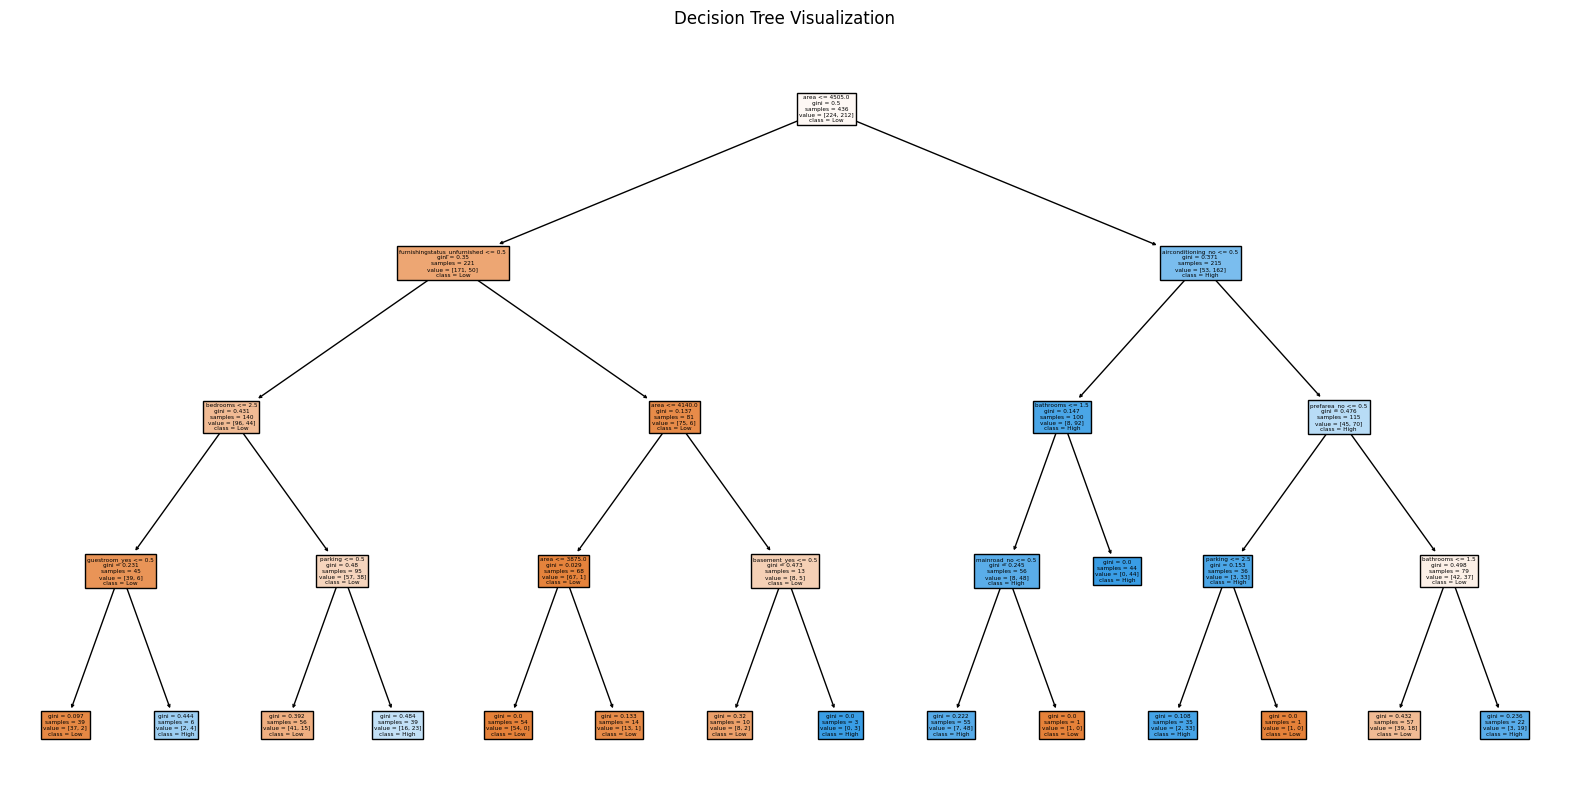


Random Forest Accuracy: 0.8073394495412844

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.74      0.90      0.81        51
           1       0.89      0.72      0.80        58

    accuracy                           0.81       109
   macro avg       0.82      0.81      0.81       109
weighted avg       0.82      0.81      0.81       109



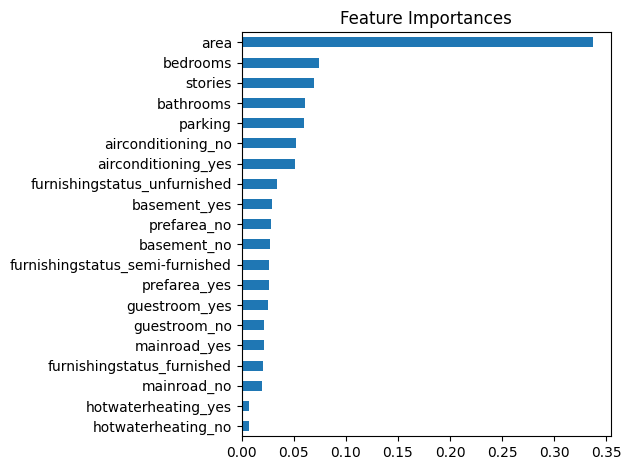


Decision Tree CV Accuracy:  0.7394495412844038
Random Forest CV Accuracy:  0.7522935779816514


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load Dataset from Local CSV
df = pd.read_csv("E:/t3/Housing.csv")

# Display Basic Info
print("Dataset Columns:\n", df.columns)
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

# --------------------------------------------
# 🔍 You must define your target here correctly!
# For example, if your dataset is for price prediction, it's a regression problem (not classification).
# If you still want to use classification, you can convert it into categories.

# Example: Convert 'price' to a binary classification task (e.g., above or below median)
if 'price' in df.columns:
    median_price = df['price'].median()
    df['target'] = (df['price'] > median_price).astype(int)  # 1 if high price, 0 if low
    df = df.drop('price', axis=1)

# Encode categorical columns if any
df = pd.get_dummies(df)

# Define Features and Target
X = df.drop('target', axis=1)
y = df['target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------ Decision Tree ------------------
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

# Tree Visualization
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=["Low", "High"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# ------------------ Random Forest ------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# ------------------ Feature Importance ------------------
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title="Feature Importances")
plt.tight_layout()
plt.show()

# ------------------ Cross-Validation ------------------
dt_cv_scores = cross_val_score(dt, X, y, cv=5)
rf_cv_scores = cross_val_score(rf, X, y, cv=5)

print("\nDecision Tree CV Accuracy: ", dt_cv_scores.mean())
print("Random Forest CV Accuracy: ", rf_cv_scores.mean())
